<div style='font-size: 200%; line-height: 2;'>
To participate, you'll need to git clone (or download the .zip from GitHub):

<p>https://github.com/scikit-image/skimage-tutorials</p>
</div>

<p>You can do that in git using:</p>

<pre>git clone --depth=1 https://github.com/scikit-image/skimage-tutorials</pre>

<div style='font-size: 200%; line-height: 1.5;'>
If you have already cloned the material, please issue `git pull` now and reload the notebook to ensure that you have the latest updates.
</div>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a 500x500 pixel grayscale image as a 2D array:

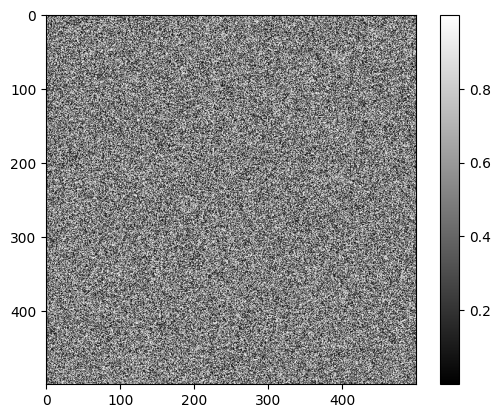

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray')
plt.colorbar();

The same holds for "real-world" images:

Note: image is loaded from skimage dataset, especially the "coins" image. See more images at [SciKit Image Samples](https://scikit-image.org/docs/stable/auto_examples/)

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


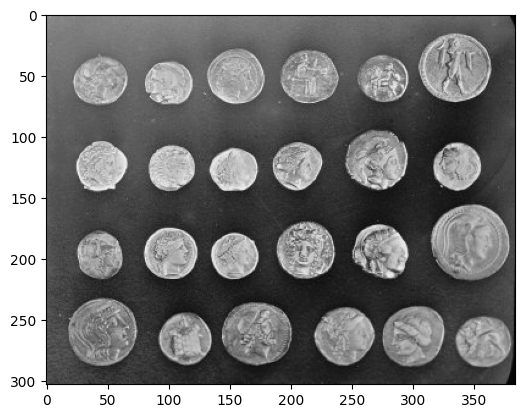

In [ ]:
from skimage import data

coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


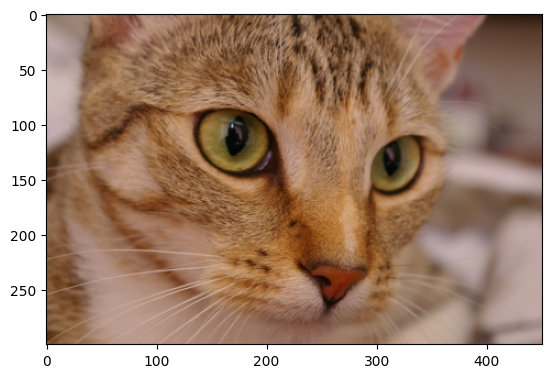

In [ ]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);

These are *just NumPy arrays*. E.g., we can make a red square by using standard array slicing and manipulation:

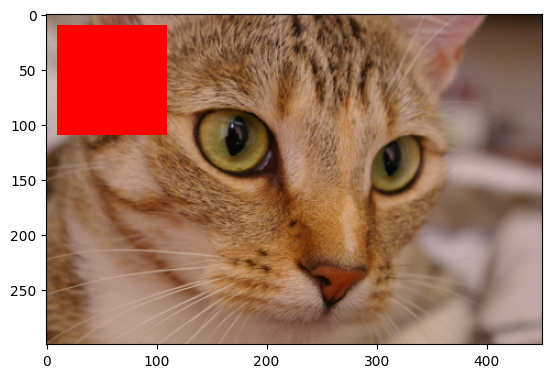

In [ ]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Another example to understand the Red-Green-Blue (RGB) channels in a composite image, is to select each color channel (layer) and plotting it either in grey colour or in the corresponding colour map (representation) of the selected colour/layer.

`image[:,:,0]` corresponds to the first ([0]) layer in the 3 dimensional stack. This is the Red channel.

Consequently the Green channel is the 2nd layer: `image[:,:,1]`, while Blue is the 3rd `image[:,:,2]`. According to image standars this is always the order how image stacks are built up.

composite (all color) and red/green/blue channels of the Colorwheel image


Text(0.5, 1.0, 'Blue channel as 2D-array with cmap="Blues_r"')

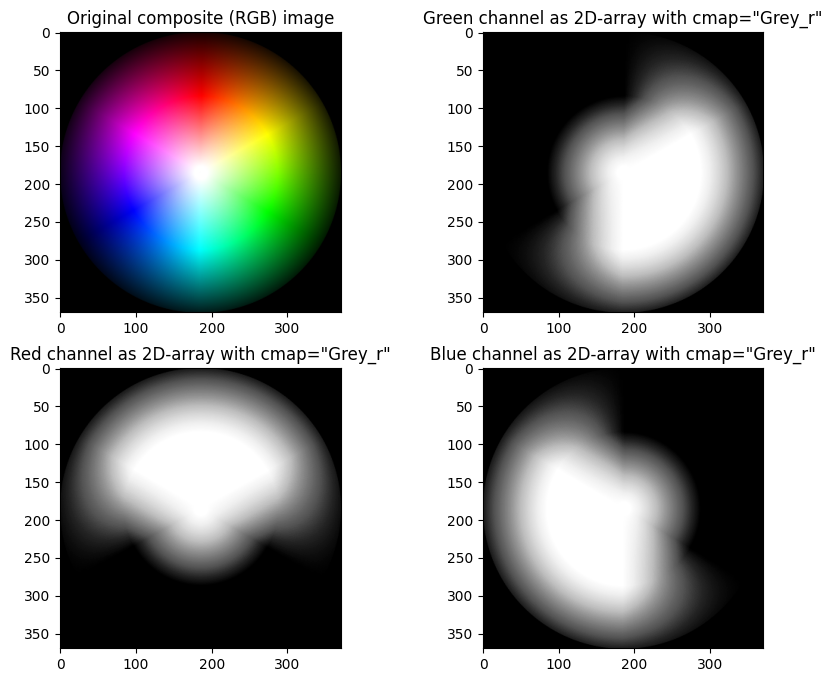

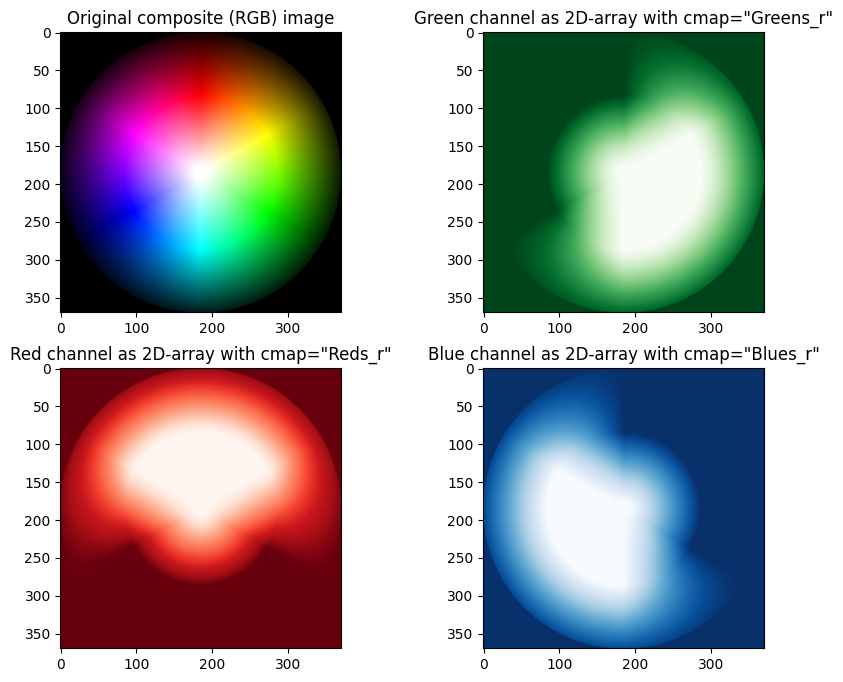

In [ ]:
colorwheel = data.colorwheel()
print('composite (all color) and red/green/blue channels of the Colorwheel image (greyscale)')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(colorwheel)
axs[1, 0].imshow(colorwheel[:, :, 0], cmap='Greys_r')
axs[0, 1].imshow(colorwheel[:, :, 1], cmap='Greys_r')
axs[1, 1].imshow(colorwheel[:, :, 2], cmap='Greys_r')
axs[0, 0].set_title('Original composite (RGB) image')
axs[1, 0].set_title('Red channel as 2D-array with cmap="Grey_r"')
axs[0, 1].set_title('Green channel as 2D-array with cmap="Grey_r"')
axs[1, 1].set_title('Blue channel as 2D-array with cmap="Grey_r"')
print('composite (all color) and red/green/blue channels of the Colorwheel image')
fig2, axs2 = plt.subplots(2, 2, figsize=(10, 8))
axs2[0, 0].imshow(colorwheel)
axs2[1, 0].imshow(colorwheel[:, :, 0], cmap='Reds_r')
axs2[0, 1].imshow(colorwheel[:, :, 1], cmap='Greens_r')
axs2[1, 1].imshow(colorwheel[:, :, 2], cmap='Blues_r')
axs2[0, 0].set_title('Original composite (RGB) image')
axs2[1, 0].set_title('Red channel as 2D-array with cmap="Reds_r"')
axs2[0, 1].set_title('Green channel as 2D-array with cmap="Greens_r"')
axs2[1, 1].set_title('Blue channel as 2D-array with cmap="Blues_r"')

Note that the both greyscale and color images are presented by imshow in a way that maximum values in the image are represented as white. This is due to automatic color mapping of the matplotlib's imshow module which converts (clos to) highest intensity values to white instead of most intense Red or Green or Blue pixels. This color mapping can be overwritten.

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*. Here a linear gradient alpha layer is introduced, notice the difference of the left and right side of the image and that it has 4 layers now.

Shape (with alpha layer): (300, 451, 4)


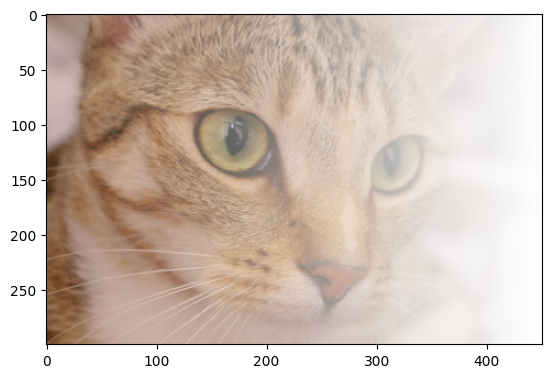

In [ ]:
cat = data.chelsea() # reloading original image
alpha_channel = np.ones(cat.shape[:2], dtype="uint8") * np.linspace(255, 0, 451, endpoint=True, dtype=np.uint8)[np.newaxis, :]
cat = np.dstack((cat, alpha_channel))  # adding an alpha layer, filling in with the linear gradient data
#cat[:,:,3] = alpha_channel # another method available after alpha layer has been added
print("Shape (with alpha layer):", cat.shape)
plt.imshow(cat);

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib
Images can be plotted, title and axis names added, supplemented with different lines.

In [ ]:
from skimage import data
img1 = data.rocket()

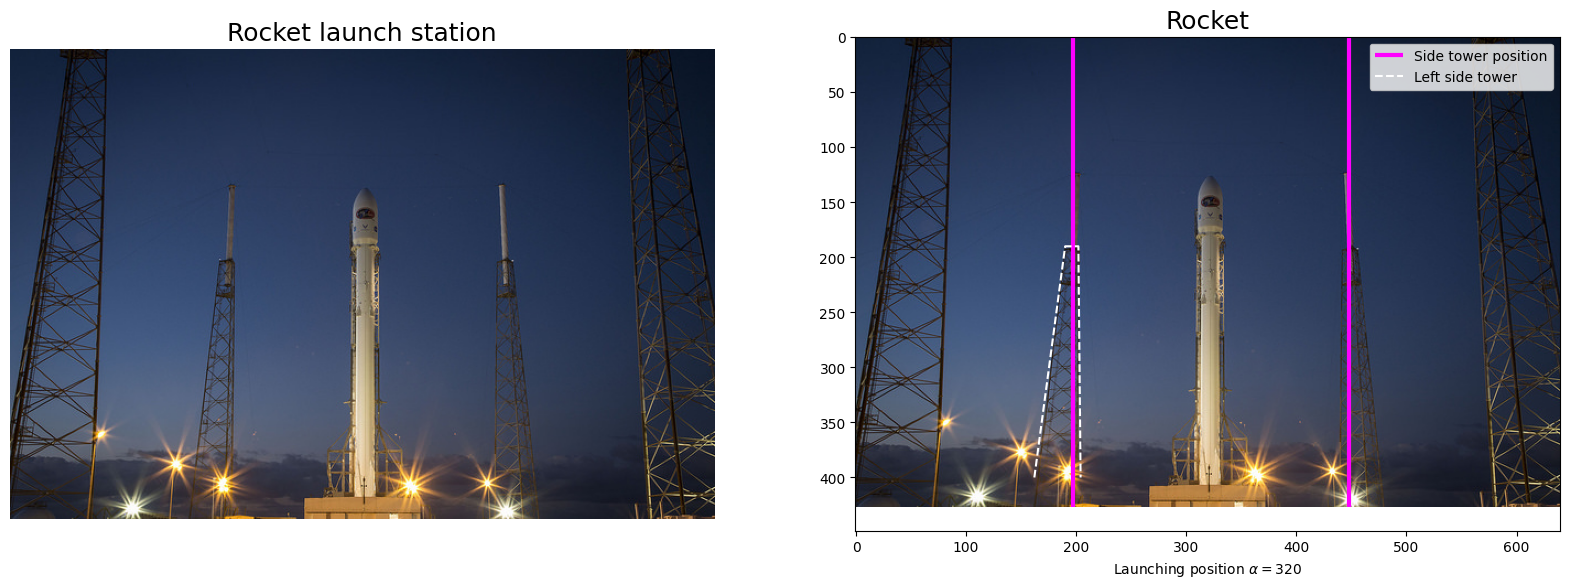

In [ ]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img1)
ax0.set_title('Rocket launch station', fontsize=18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([197, 448], 0, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')
ax1.plot([162, 190, 202, 204], [400, 190, 190, 400], color='white', linestyle='--', label='Left side tower')

ax1.legend();

For more on plotting, see the [Matplotlib documentation](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```
Note: low value of the channel is typically represented as black
  while high value of the channel is typically represented as the most intense color of the channel, which in case of greyscale image is black, but is bright red/green/blue if it is a color channel. It is also important to note that the color channels are mainly plotted in greyscale because human eye sees better the differences in the shades of grey then in a uni-color image. Just keep in mind which color channel is plotted.

``scikit-image`` supports both conventions - the choice is made automatically by the software recognising the data-type of the image array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


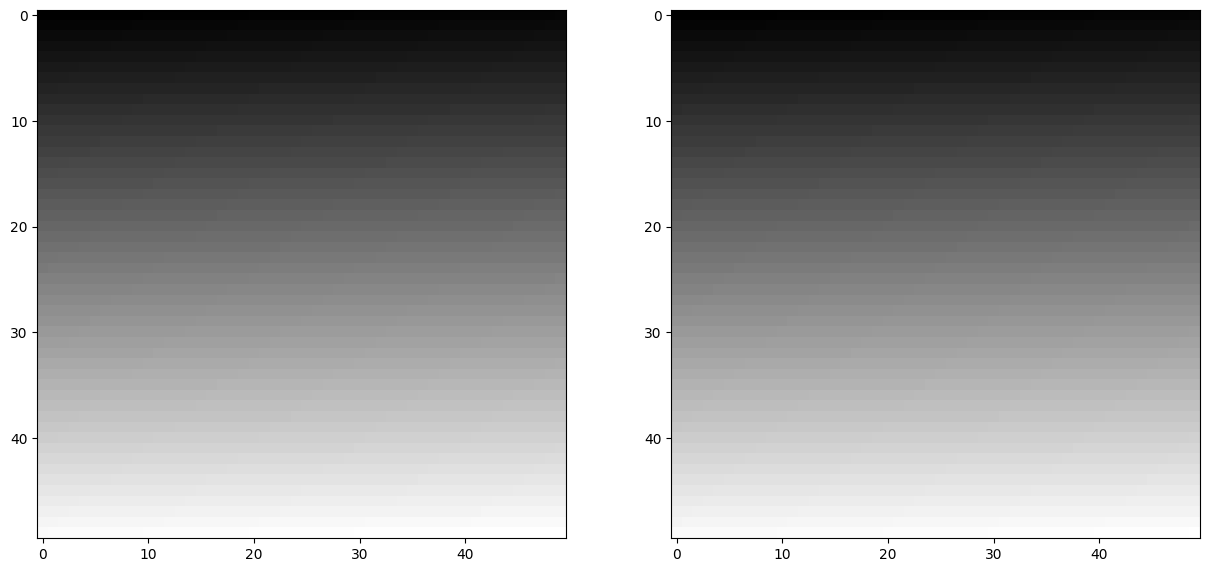

In [ ]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The ``scikit-image`` library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

See the red channel intensity values in the cat image at a 6x6 pixel subset:

In [ ]:
cat[0:5,0:5,0] #click on show data to see the numbers (uint8, 0-255) corresponding to the pixel in the image

array([[143, 143, 141, 141, 141],
       [146, 145, 143, 142, 142],
       [148, 147, 146, 145, 145],
       [151, 149, 147, 147, 146],
       [153, 151, 150, 149, 148]], dtype=uint8)

You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.:

In [ ]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("Proof of max 231 (uint8) value converted to float64 value: 231/255 =", 231/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

Proof of max 231 unit8 value converted to float64 value: 231/255 = 0.9058823529411765


Uint8 images pixel values (intensity of each pixel) can range from 0 to a maximum of 255 corresponding to the 8 bit range (2^8 = 256). It is a range that can be used but not all images have 0 or 255 values, if there is no perfectly dark (black) spot or perfectly bright (or oversaturated) pixel when the image is taken/created. In the image above 0 is present, but the brightest value is 231!

To compare with the values above, see the float64 values of the same (but converted) pixels:

In [ ]:
image_float[0:5,0:5,0] #click on show data to see the numbers (float64, 0-1) corresponding to the pixel in the image

array([[0.56078431, 0.56078431, 0.55294118, 0.55294118, 0.55294118],
       [0.57254902, 0.56862745, 0.56078431, 0.55686275, 0.55686275],
       [0.58039216, 0.57647059, 0.57254902, 0.56862745, 0.56862745],
       [0.59215686, 0.58431373, 0.57647059, 0.57647059, 0.57254902],
       [0.6       , 0.59215686, 0.58823529, 0.58431373, 0.58039216]])

Similarly, matplotlib also recognise the data type of the input image and optimize the plotting, so we see two perfectly similar images:

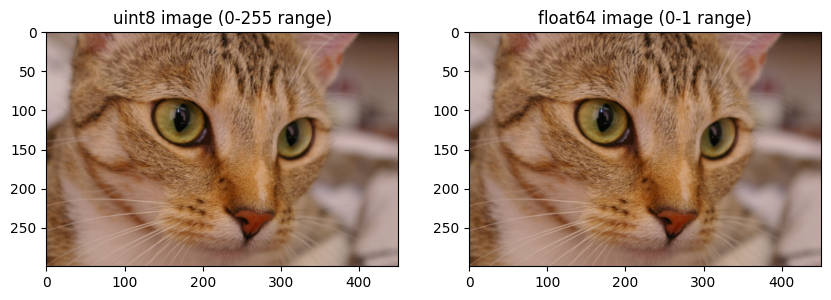

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))
ax0.imshow(image_ubyte)
ax1.imshow(image_float)
ax0.set_title('uint8 image (0-255 range)')
ax1.set_title('float64 image (0-1 range)');

Your image processing code would then typically look like this:

```python
def my_imageprocessing_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
   ...
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the *scikit-image* example data sets.  Those images are typically stored in JPEG or PNG format.  Since *scikit-image* operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include imageio, matplotlib, pillow, etc.

*scikit-image* conveniently wraps many of these in the `io` submodule, and will use whichever of the libraries mentioned above are installed:

<class 'numpy.ndarray'>
uint8
(300, 225, 3)
0 255


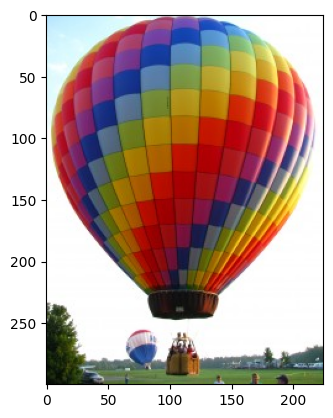

In [ ]:
from skimage import io

try:
  image = io.imread('../images/balloon.jpg') #use to load files stored locally
except:
  image = io.imread('https://github.com/scikit-image/skimage-tutorials/blob/main/images/balloon.jpg?raw=true') # use original Github repo image

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images (works only on local image folder):

In [ ]:
ic = io.ImageCollection('../images/*.png:../images/*.jpg')

print('Type:', type(ic))

ic.files

In [ ]:
import os

f, axes = plt.subplots(nrows=3, ncols=len(ic) // 3 + 1, figsize=(20, 5))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))

plt.tight_layout()

NameError: name 'ic' is not defined

### Aside: `enumerate`

`enumerate` gives us each element in a container, along with its position (index in the list, starting from 0).

In [ ]:
animals = ['cat', 'dog', 'leopard']

In [ ]:
for i, animal in enumerate(animals):
    print('The animal in position {} is {}'.format(i, animal))

The animal in position 0 is cat
The animal in position 1 is dog
The animal in position 2 is leopard


## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

(fix the code writing the H letter form in the image at the given position)

In [ ]:
def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()

    #define code to create the H shape
    ... replace this line with code

    return out

Test your function like so:

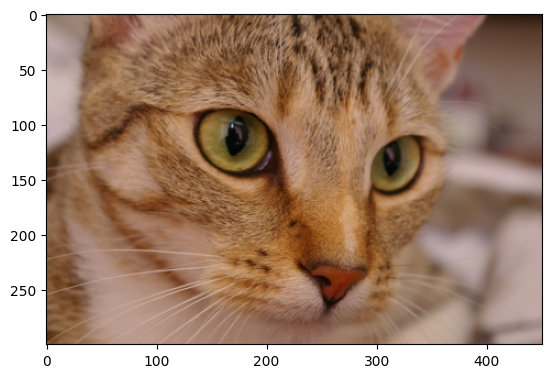

In [ ]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template (fix the code to select the appropriate color channels):

In [ ]:
# --- read in the image ---

#image = plt.imread('../images/Bells-Beach.jpg') #use to load files stored locally
image = io.imread('https://github.com/scikit-image/skimage-tutorials/blob/main/images/Bells-Beach.jpg?raw=true') # use original Github repo image

# --- assign each color channel to a different variable ---

r = image...  # Red channel
g = image...  # Green channel
b = image...  # Blue channel

Now display each color channel separately, as greyscale images and then the re-united composite image. Note that the forest is relatively dark in the blue layer meaning less blue colour present, also the sandy beach part has more green and a lot of red compared to blue (which is dark grey, low intensity) at that region of the image.

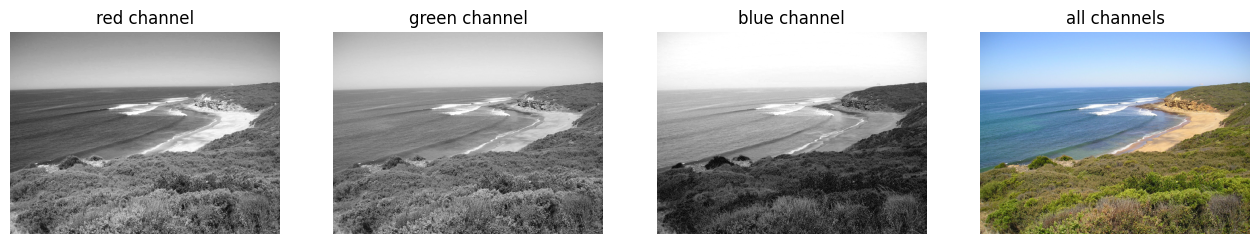

In [ ]:
# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes

ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

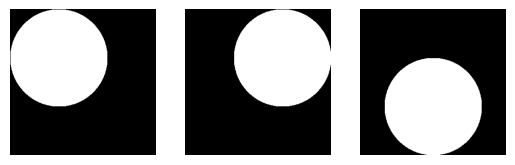

In [ ]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.disk(center=(100, 100), radius=100)
red[r, c] = 1

r, c = draw.disk(center=(100, 200), radius=100)
green[r, c] = 1

r, c = draw.disk(center=(200, 150), radius=100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`. More details [skimage rgb2gray](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html)

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

Text(0.5, 1.0, 'my rgb2gray')

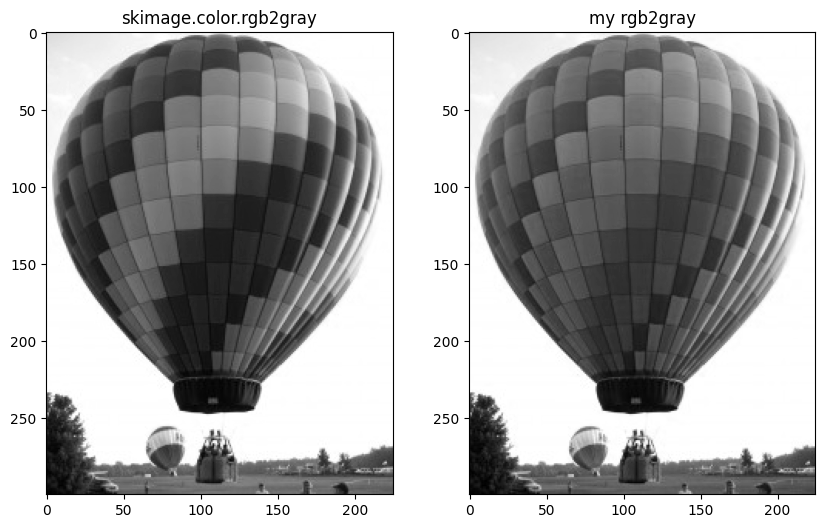

In [ ]:
from skimage import color, img_as_float
try:
  image = img_as_float(io.imread('../images/balloon.jpg')) #use to load files stored locally
except:
  image = io.imread('https://github.com/scikit-image/skimage-tutorials/blob/main/images/balloon.jpg?raw=true') # use original Github repo image

gray = color.rgb2gray(image)
# Coefficients for luminance calculation

my_gray = image @ ...  # FIXME

# --- display the results ---

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')